In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [100]:
data = pd.read_csv('DanishFungi2020_test_metadata_DEV.csv')
len_data = len(data)

In [101]:
data.isnull().sum().sort_values(ascending=False)/len(data)

infraspecificEpithet    1.000000
CoorUncert              0.012705
identifiedBy            0.005508
Substrate               0.005339
level2Name              0.004562
level2Gid               0.004562
level1Name              0.004528
level1Gid               0.004528
level0Name              0.004528
level0Gid               0.004528
Habitat                 0.003954
order                   0.000574
locality                0.000338
class                   0.000101
species                 0.000101
Longitude               0.000034
Latitude                0.000034
eventDate               0.000034
day                     0.000034
month                   0.000034
year                    0.000034
image_url               0.000000
rightsHolder            0.000000
image_path              0.000000
class_id                0.000000
genus_id                0.000000
gbifID                  0.000000
ImageUniqueID           0.000000
taxonRank               0.000000
specificEpithet         0.000000
genus     

In [102]:
### Filtering the data based on the kingdom Fungi & CoorUncert small than 1000m

data_filtered = data[data['kingdom']=='Fungi']\
                    [data['CoorUncert']<1000].reset_index()

### Dropping the useless columns

data_filtered.drop(columns=['rightsHolder','image_url',
                   'identifiedBy','infraspecificEpithet',
                  'level0Gid','level0Name', 'level1Gid', 'level1Name', 
                   'level2Gid', 'level2Name','gbifID','kingdom','taxonRank','locality'], inplace=True)

<ipython-input-102-754c66328ccd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered = data[data['kingdom']=='Fungi']\


In [103]:
data_filtered.isnull().sum().sort_values(ascending=False)/len(data_filtered)

Substrate          0.005455
Habitat            0.003977
order              0.000598
species            0.000106
class              0.000106
Longitude          0.000035
Latitude           0.000035
index              0.000000
genus_id           0.000000
class_id           0.000000
image_path         0.000000
CoorUncert         0.000000
ImageUniqueID      0.000000
genus              0.000000
specificEpithet    0.000000
eventDate          0.000000
family             0.000000
phylum             0.000000
scientificName     0.000000
taxonID            0.000000
countryCode        0.000000
day                0.000000
month              0.000000
year               0.000000
family_id          0.000000
dtype: float64

In [104]:
### Drop the remaining na

data_filtered.dropna(inplace=True)

### Check that there is no null values left

data_filtered.isnull().sum().sort_values(ascending=False)/len(data_filtered)

data_filtered.reset_index(inplace=True)

In [105]:
### Rename the column eventDate to date

data_filtered = data_filtered.rename(columns={'eventDate':'date'})

### Turning the date object into a datetime object

data_filtered['date'] = pd.to_datetime(data_filtered['date'])

## Duplicates & outliers

In [106]:
l1 = len(data_filtered)

data_filtered.drop_duplicates(inplace=True)

l2 = len(data_filtered)

if l1-l2 == 0:
    print("There were no duplicates")
else:
    print("The duplicates were removed")

There were no duplicates


In [107]:
data_filtered.dtypes

level_0                     int64
index                       int64
date               datetime64[ns]
year                      float64
month                     float64
day                       float64
countryCode                object
taxonID                   float64
scientificName             object
phylum                     object
class                      object
order                      object
family                     object
genus                      object
specificEpithet            object
species                    object
ImageUniqueID              object
Substrate                  object
Latitude                  float64
Longitude                 float64
CoorUncert                float64
Habitat                    object
image_path                 object
class_id                    int64
genus_id                    int64
family_id                   int64
dtype: object

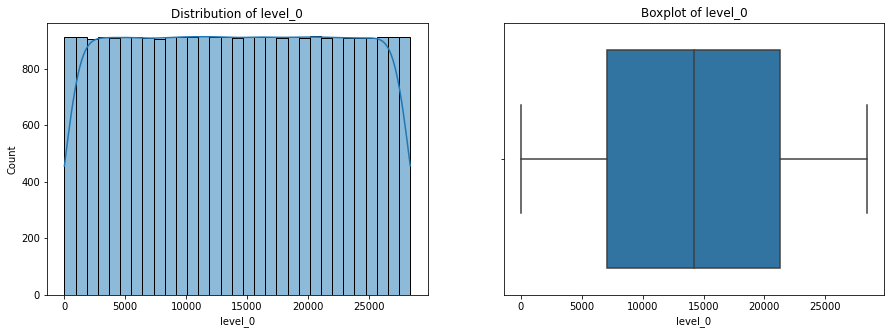

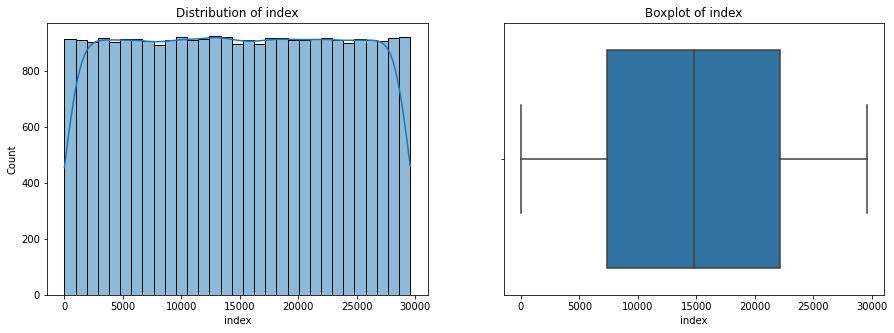

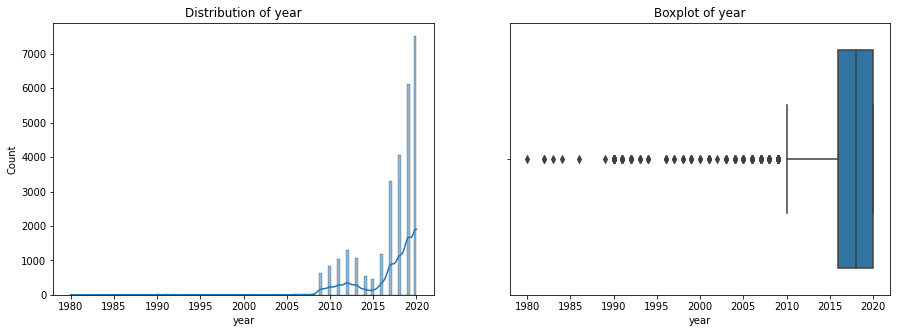

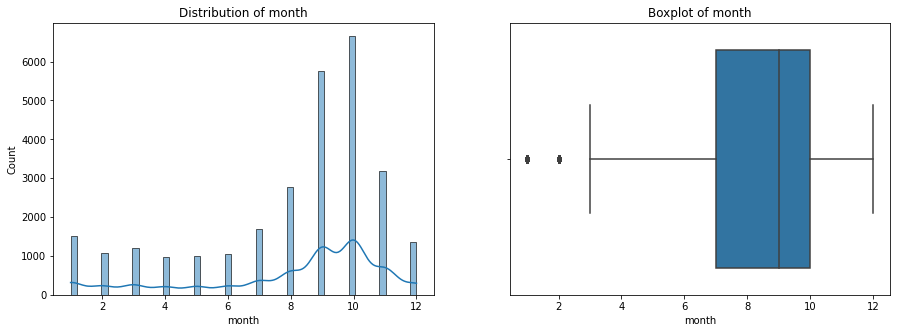

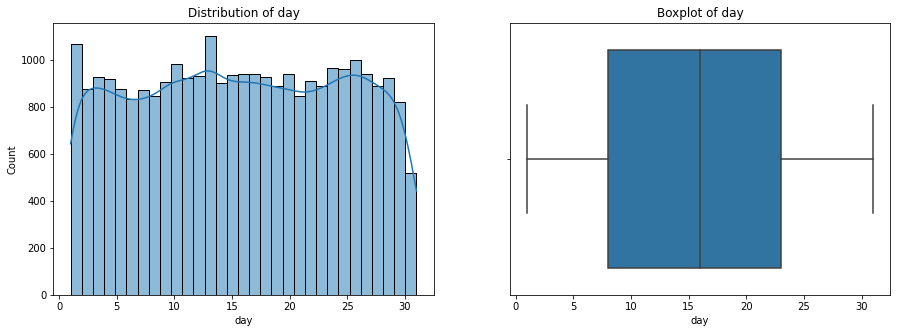

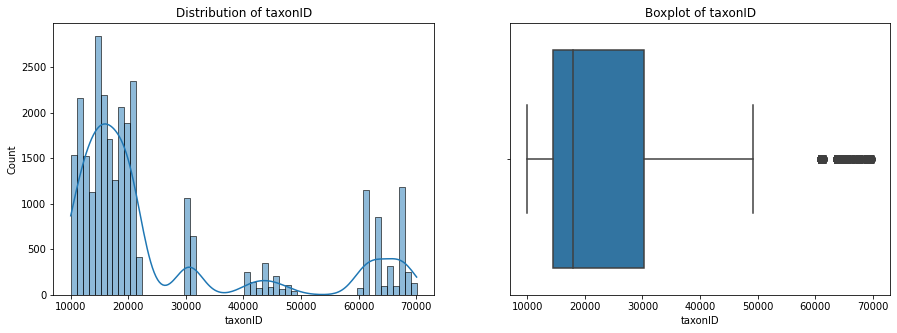

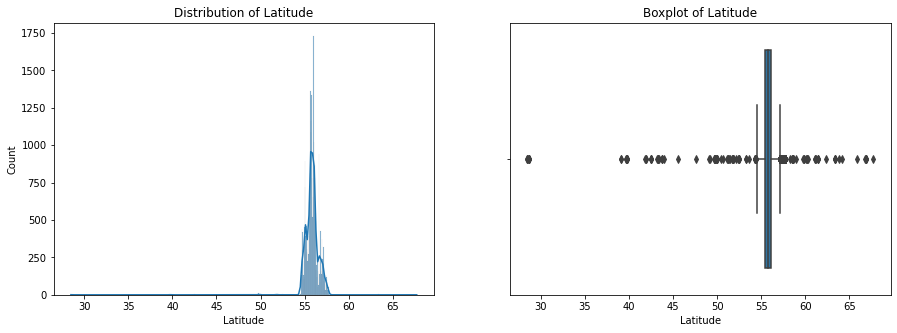

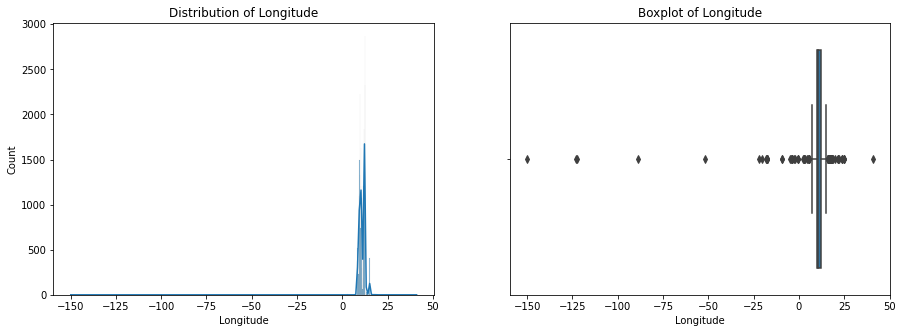

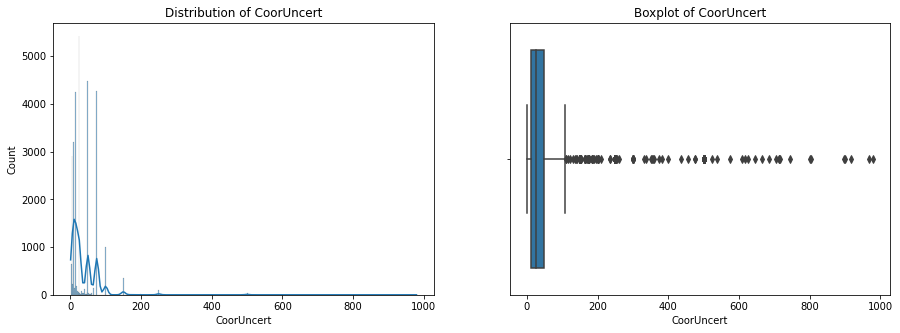

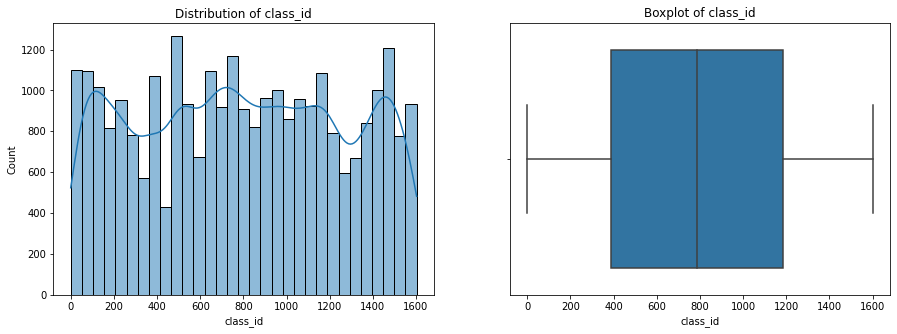

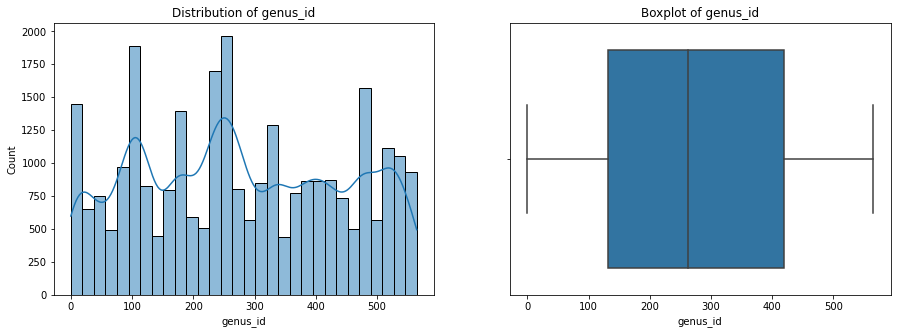

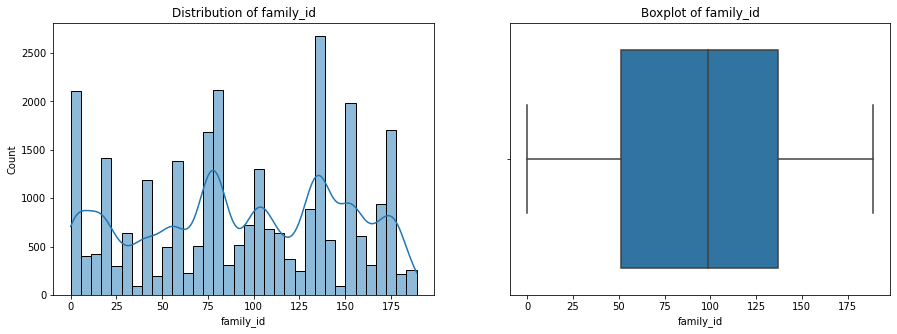

In [108]:
## Select columns, excluding objects
input_num = data_filtered.select_dtypes(exclude=["object","datetime"])
## Store the column names in a variable
num_features = input_num.columns
## Loop over all the selected columns to generate the plots
for num_feature in num_features:
   ## Generate the subplots
   fig, ax = plt.subplots(1, 2, figsize=(15,5))
   ## Generate the distribution plot
   ax[0].set_title(f"Distribution of {num_feature}")
   sns.histplot(data=data_filtered, x=num_feature, kde=True, ax = ax[0])
   ## Generate the boxplot
   ax[1].set_title(f"Boxplot of {num_feature}")
   sns.boxplot(data=data_filtered, x=num_feature, ax = ax[1])

In [109]:
print(f'{round((data_filtered[data_filtered["year"]<1999].count()/len(data_filtered))["month"],4)*100}%\
 of the data was collected before 2000, so we\'ll drop it')

data_final = data_filtered[data_filtered["year"]>1999]

0.21% of the data was collected before 2000, so we'll drop it


In [110]:
len_fin = len(data_final)

data_points_dropped = len_data-len_fin

f'We dropped {data_points_dropped} data points, which represents approximately\
 {round(data_points_dropped/len_data,2)*100}% of our dataset. Our dataset is now composed of {len_fin} images'

'We dropped 1437 data points, which represents approximately 5.0% of our dataset. Our dataset is now composed of 28157 images'

## Organizing the datasets

In [111]:
data_final['image_path'] = data_final['image_path'].map(lambda x: x.replace('/Datasets/DF20/',''))
data_final['image_path']

<ipython-input-111-64a608f47bcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['image_path'] = data_final['image_path'].map(lambda x: x.replace('/Datasets/DF20/',''))


0        2238478820-167801.jpg
1        2238556391-255108.jpg
2        2238578371-259639.jpg
3        2238558829-107623.jpg
4        2238574996-258884.jpg
                 ...          
28216    2430666160-196767.jpg
28217     2238433219-90343.jpg
28218      2237958103-4460.jpg
28219    2238591442-337122.jpg
28220      2237949263-4009.jpg
Name: image_path, Length: 28157, dtype: object

In [57]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [58]:
import shutil
import os

paths = list(data_final['image_path'])

origin = '../raw_data/images/'

target = '../raw_data/mini_train/'

for path in log_progress(paths, every=1):

    shutil.copy2(os.path.join(origin,path),os.path.join(target,path))

In [112]:
data_final.to_csv('metadata_test.csv')

## Seasonality - (Useless at the moment)

In [173]:
def season(date):
    if date.month >= 12 and date.day >= 21 or date.month <= 3 and date.day < 21:
        return 1
    elif date.month >= 3 and date.day >= 21 or date.month <= 6 and date.day < 21:
        return 2
    elif date.month >= 6 and date.day >= 21 or date.month <= 9 and date.day < 21:
        return 3
    else:
        return 4

data['season_num'] = data['date'].map(lambda x: season(x))

In [174]:
data['season_cat'] = data['season_num'].map({1:'Winter',
                                            2: 'Spring',
                                            3: 'Summer',
                                            4: 'Winter'})
data['season_cat']

0         Spring
1         Winter
2         Spring
3         Spring
4         Spring
           ...  
266339    Spring
266340    Spring
266341    Summer
266342    Winter
266343    Spring
Name: season_cat, Length: 261147, dtype: object

In [175]:
dates = data[['family','month']].groupby(by='month').count().reset_index()
dates['month']= dates['month'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                                    7:'July',8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
dates

,month,family
0,January,13454
1,February,9921
2,March,11173
3,April,9096
4,May,9314
5,June,9905
6,July,15861
7,August,26205
8,September,52924
9,October,60713


## Interactive graphs (for later)

In [170]:
from ipywidgets import interact

@interact
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='family',data=dates, palette='viridis');

SyntaxError: invalid syntax (<ipython-input-170-358dfb0f0351>, line 4)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

token = open("pk.eyJ1IjoiaGFkcmk5NiIsImEiOiJja3B4cHV6d24wMDFjMzBqc29neXgyb2VqIn0.ju_WsYC12VK2eTCNNs1aCg").read()

df = px.data.election()


In [ ]:
geojson = px.data.election_geojson()
candidates = df.winner.unique()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Candidate:"),
    dcc.RadioItems(
        id='candidate', 
        options=[{'value': x, 'label': x} 
                 for x in candidates],
        value=candidates[0],
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="choropleth"),
])

@app.callback(
    Output("choropleth", "figure"), 
    [Input("candidate", "value")])
def display_choropleth(candidate):
    fig = px.choropleth_mapbox(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        center={"lat": 45.5517, "lon": -73.7073}, zoom=9,
        range_color=[0, 6500])
    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_accesstoken=token)

    return fig

app.run_server(debug=True)